# Latin Hypercube Sampling using UQpy

Author: Dimitris G. Giovanis,  
Date: May 13, 2020  
UQpy Version 3.0

In [1]:
# Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib,
# but also need to import the LHS class from UQpy.
from UQpy.sampling import LatinHypercubeSampling
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Import the necessary Distributions from Distribution class to create the Distribution object
# We are going to run LHS for two uniform U(0,1) random variables.
from UQpy.distributions import Uniform
dist1 = Uniform(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)

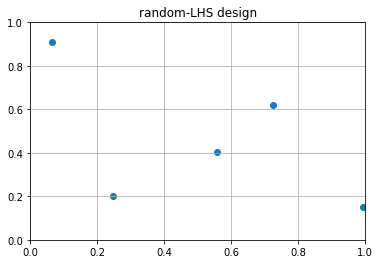

In [3]:
from UQpy.sampling.latin_hypercube_criteria import Random
x1c = LatinHypercubeSampling(distributions=[dist1, dist2], samples_number=5,
                             criterion=Random(random_state=np.random.RandomState(789)))

fig, ax = plt.subplots()
plt.title('random-LHS design')
plt.scatter(x1c.samples[:, 0], x1c.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

[[0.13929384 0.08462129]
 [0.25722787 0.53696595]
 [0.44537029 0.8784235 ]
 [0.94389379 0.69618638]
 [0.71026295 0.39615284]]


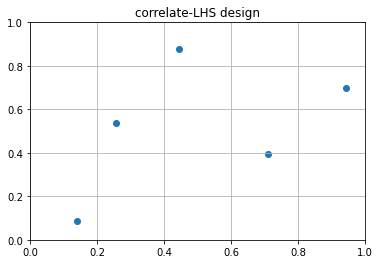

In [4]:
from UQpy.sampling.latin_hypercube_criteria import MaxiMin
x1a = LatinHypercubeSampling(distributions=[dist1, dist2],
                             criterion=MaxiMin(random_state=np.random.RandomState(123)),
                             samples_number=5)
print(x1a.samples)

fig, ax = plt.subplots()
plt.title('correlate-LHS design')
plt.scatter(x1a.samples[:, 0], x1a.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

[[0.25830169 0.60670942]
 [0.03780125 0.11970351]
 [0.84553232 0.4163034 ]
 [0.5177278  0.22475741]
 [0.70107012 0.88874507]]


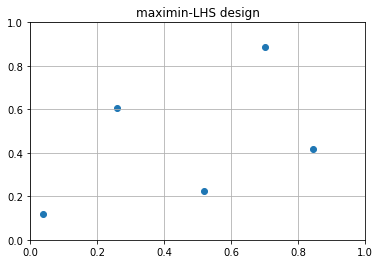

[[0.55875577 0.40494539]
 [0.72488394 0.622208  ]
 [0.99508209 0.15177718]
 [0.24604942 0.20212401]
 [0.06466696 0.90762988]]


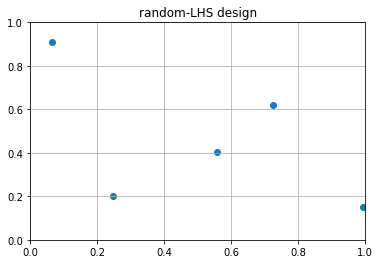

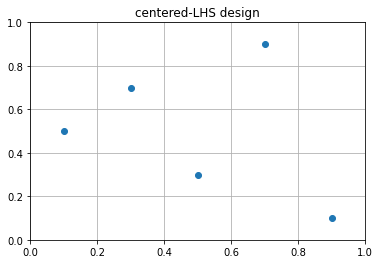

[[0.9 0.1]
 [0.3 0.7]
 [0.7 0.9]
 [0.1 0.5]
 [0.5 0.3]]


In [5]:
from UQpy.sampling.latin_hypercube_criteria import DistanceMetric
x1b = LatinHypercubeSampling(distributions=[dist1, dist2],
                             criterion=MaxiMin(metric=DistanceMetric.CHEBYSHEV),
                             samples_number=5)
print(x1b.samples)

fig, ax = plt.subplots()
plt.title('maximin-LHS design')
plt.scatter(x1b.samples[:, 0], x1b.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

x1c = LatinHypercubeSampling(distributions=[dist1, dist2], samples_number=5,
                             criterion=Random(random_state=np.random.RandomState(789)))
print(x1c.samples)

fig, ax = plt.subplots()
plt.title('random-LHS design')
plt.scatter(x1c.samples[:, 0], x1c.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

from UQpy.sampling.latin_hypercube_criteria import Centered
x1d = LatinHypercubeSampling(distributions=[dist1, dist2], criterion=Centered(),
                             samples_number=5)

fig, ax = plt.subplots()
plt.title('centered-LHS design')
plt.scatter(x1d.samples[:, 0], x1d.samples[:, 1])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

print(x1d.samples)

In [6]:
from UQpy.distributions import Uniform, Normal
dist1 = Normal(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)

x2a = LatinHypercubeSampling(distributions=[dist1, dist2],
                             criterion=Centered(random_state=np.random.RandomState(45)),
                             samples_number=5)
print('LHS design:', x2a.samples)

LHS design: [[ 0.52440051  0.5       ]
 [ 0.          0.3       ]
 [ 1.28155157  0.7       ]
 [-0.52440051  0.1       ]
 [-1.28155157  0.9       ]]


In [7]:
# Run LHS for a user-defined criterion and metric
# def distance(x):
#    return x+1
from scipy.spatial.distance import pdist

from UQpy.sampling.latin_hypercube_criteria import Criterion

class UserCriterion(Criterion):
    def generate_samples(self):
        lhs_samples = np.zeros_like(self.samples)
        for j in range(self.samples.shape[1]):
            order = np.random.permutation(self.samples.shape[0])
            lhs_samples[:, j] = self.samples[order, j]
        return lhs_samples


dist1 = Uniform(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)

x1e = LatinHypercubeSampling(distributions=[dist1, dist2], samples_number=5,
                             criterion=UserCriterion())
print(x1e.samples)

x1d = LatinHypercubeSampling(distributions=[dist1, dist2], samples_number=5)
print(x1d.samples)

[[0.32911944 0.10362239]
 [0.93702297 0.71940196]
 [0.78830892 0.51030345]
 [0.01620396 0.83819175]
 [0.51047133 0.35262819]]
[[0.21964903 0.1729003 ]
 [0.57172787 0.97737334]
 [0.90046624 0.56551407]
 [0.79055864 0.33728233]
 [0.11411989 0.65004308]]


In [8]:
# We are going to run LHS for a Joint distribution.
from UQpy.distributions import Normal, Lognormal, JointIndependent
marginals = [Normal(loc=2., scale=2.), Lognormal(s=1., loc=0., scale=np.exp(5))]
dist = JointIndependent(marginals=marginals)

x2 = LatinHypercubeSampling(distributions=dist, samples_number=5,
                            criterion=MaxiMin(random_state=np.random.RandomState(123)))
print(x2.samples)

[[-1.66994935e-01  3.75381743e+01]
 [ 6.96169151e-01  1.62844032e+02]
 [ 1.72526566e+00  4.76821444e+02]
 [ 5.17665403e+00  2.48008583e+02]
 [ 3.10830614e+00  1.14055167e+02]]
